<a href="https://colab.research.google.com/github/laxmangautam/30-seconds-of-code/blob/master/StartUp_Investments_Crunchbase_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

ROOT_DIR = '/content/drive/MyDrive/MS_4th_Sem_kmutt/Thesis/Success-Prediction-Analysis-for-Startups-main/Data'
print(ROOT_DIR)

strtup_invest = pd.read_csv(ROOT_DIR +'/investments.csv',encoding = 'ISO-8859-1')
print(strtup_invest.shape)
strtup_invest.head(5)

/content/drive/MyDrive/MS_4th_Sem_kmutt/Thesis/Success-Prediction-Analysis-for-Startups-main/Data
(114506, 24)


,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,NaN,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,...,NaN,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,1921-09,1921-Q3,1921,"1,000"
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,1974-01,1974-Q1,1974,NaN
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,"10,00,000"
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,"10,00,000"
4,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,1982-06,1982-Q2,1982,"7,24,000"


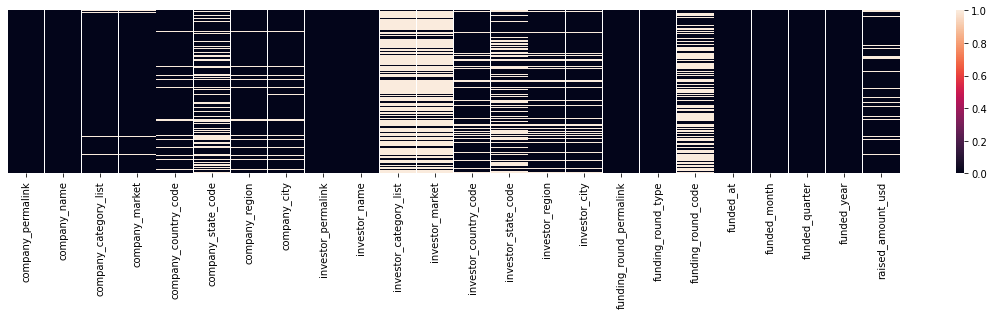

In [15]:
# let's check for null values first
fig = plt.figure(figsize=(20,3))
sns.heatmap(data =strtup_invest.isnull(),yticklabels=False)
plt.show()

## a lot of null values in bottom section of file. let's get rid of them

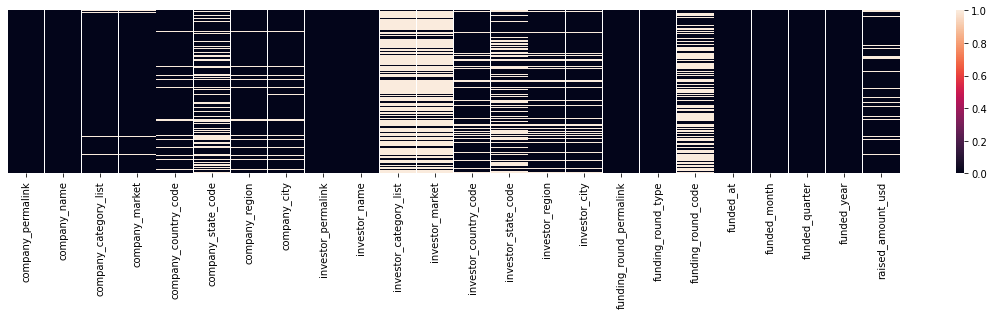

In [16]:
#a lot of null values in bottom section of file. let's get rid of them
strtup_invest.dropna(how='all',axis=0,inplace=True)
fig = plt.figure(figsize=(20,3))
sns.heatmap(data =strtup_invest.isnull(),yticklabels=False)
plt.show()

In [21]:
#the data suggest column 'permalink' should have a unique values. let's check for duplicates there
print(strtup_invest.columns)
strtup_invest[strtup_invest.duplicated('company_permalink',keep=False)]


Index(['company_permalink', 'company_name', 'company_category_list',
       'company_market', 'company_country_code', 'company_state_code',
       'company_region', 'company_city', 'investor_permalink', 'investor_name',
       'investor_category_list', 'investor_market', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'funded_month', 'funded_quarter', 'funded_year',
       'raised_amount_usd'],
      dtype='object')


,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,"10,00,000"
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,"10,00,000"
21,/organization/nhk-world,NHK World,|News|,News,NaN,NaN,NaN,NaN,/organization/itochu-corporation,ITOCHU Corporation,...,Tokyo,Tokyo,/funding-round/bdae954da8883f9b4dab3dce9a62c5ed,venture,D,1987-06-16,1987-06,1987-Q2,1987,NaN
22,/organization/nhk-world,NHK World,|News|,News,NaN,NaN,NaN,NaN,/organization/microsoft,Microsoft,...,Seattle,Redmond,/funding-round/bdae954da8883f9b4dab3dce9a62c5ed,venture,D,1987-06-16,1987-06,1987-Q2,1987,NaN
31,/organization/knowledge-adventure,Knowledge Adventure,|Games|,Games,USA,CA,Los Angeles,Torrance,/person/william-lohse,William Lohse,...,NaN,NaN,/funding-round/04081f1e737343aefe19db52a1f10da7,seed,NaN,1990-01-01,1990-01,1990-Q1,1990,"60,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114500,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/organization/vine-st-ventures,Vine St. Ventures,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,2014-12,2014-Q4,2014,"12,00,000"
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,2014-12-02,2014-12,2014-Q4,2014,"1,70,00,000"
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,NaN,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,...,NaN,NaN,/funding-round/bfb0b5859be2431f35882bc03370dd67,venture,NaN,2014-12-02,2014-12,2014-Q4,2014,NaN
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,2014-12,2014-Q4,2014,"12,00,000"


## Q1. How's the sector wise distribution of statup funds looks like ?

In [28]:

strtup_invest.dropna(subset=['raised_amount_usd'], how='all', inplace=True)
strtup_invest

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,<NA>,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,...,NaN,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,1921-09,1921-Q3,1921,1000
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,1979-01,1979-Q1,1979,1000000
4,/organization/ikro,Ikro,NaN,<NA>,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,1982-06,1982-Q2,1982,724000
5,/organization/laborat-rios-noli,Laboratórios Noli,NaN,<NA>,BRA,NaN,Porto Alegre,Porto Alegre,/organization/crp-companhia-de-participacoes,CRP Companhia de Participac?o?es,...,NaN,NaN,/funding-round/5bdff09243b72f7fb325146259880e93,venture,A,1982-12-01,1982-12,1982-Q4,1982,155000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114499,/organization/xeltis,Xeltis,NaN,<NA>,CHE,NaN,Zurich,Zürich,/organization/vi-partners,VI Partners,...,Zurich,Zug,/funding-round/03dd9b7cfc4a45a1bd6903143423f207,venture,B,2014-12-02,2014-12,2014-Q4,2014,34000000
114500,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/organization/vine-st-ventures,Vine St. Ventures,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,2014-12,2014-Q4,2014,1200000
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,2014-12-02,2014-12,2014-Q4,2014,17000000
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,2014-12,2014-Q4,2014,1200000


In [24]:
#eliminating the duplicate
strtup_invest_q1 = strtup_invest

## Also, let's fix the datatype of required columns

In [29]:
#Also, let's fix the datatype of required columns
strtup_invest_q1['company_market'] =pd.Series(strtup_invest_q1['company_market'],dtype='string')
strtup_invest_q1['raised_amount_usd'] = pd.Series(strtup_invest_q1['raised_amount_usd'],dtype='string')
strtup_invest_q1[['company_market','raised_amount_usd']] = strtup_invest_q1[['company_market','raised_amount_usd']].apply(lambda x: x.str.strip())
strtup_invest_q1['raised_amount_usd'] = strtup_invest_q1['raised_amount_usd'].str.replace(',','')
strtup_invest_q1.drop(strtup_invest_q1[strtup_invest_q1['raised_amount_usd']=='-'].index,axis=0,inplace=True)
strtup_invest_q1['raised_amount_usd'] = strtup_invest_q1['raised_amount_usd'].astype('int64')

## Q1. How's the sector wise distribution of statup funds looks like 

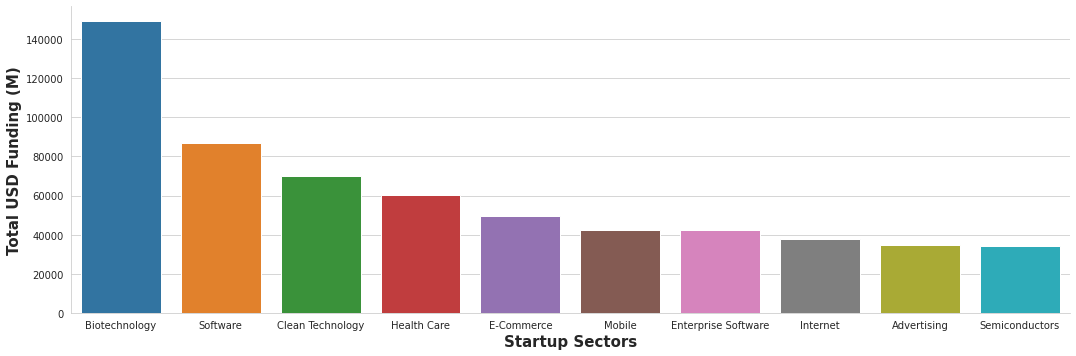

In [31]:
strtup_invest_q1 = strtup_invest_q1.groupby(['company_market'],as_index=False).sum().sort_values('raised_amount_usd',ascending=False)
strtup_invest_q1 = strtup_invest_q1[:10]
strtup_invest_q1['raised_amount_usd'] = strtup_invest_q1['raised_amount_usd']/1000000

sns.set_style('whitegrid')
g = sns.catplot(data=strtup_invest_q1,x='company_market',y='raised_amount_usd',aspect=3,kind='bar')
g.set_xlabels('Startup Sectors',size=15,weight='bold')
g.set_ylabels('Total USD Funding (M)',size=15,weight='bold')
plt.show()

## Q2. What's the country wise startup distribution ?

In [33]:
strtup_invest_q2 =strtup_invest[['company_country_code']].groupby(['company_country_code'],as_index=False).agg(total=('company_country_code','count'))
strtup_invest_q2 = strtup_invest_q2[strtup_invest_q2['company_country_code'].isin(list(strtup_invest_q2.groupby('company_country_code')['total'].agg("sum")
                                        .sort_values('index',ascending=False)[:10].index))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

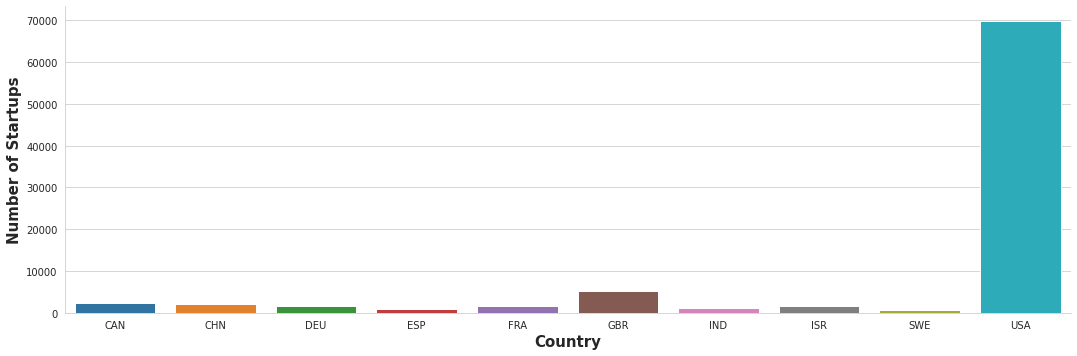

In [35]:
g = sns.catplot(data=strtup_invest_q2,x='company_country_code',y='total',kind='bar'
            ,aspect=3,ci=False,sharey=True)
g.set_xlabels('Country',size=15,weight='bold')
g.set_ylabels('Number of Startups',size=15,weight='bold')
plt.show

## Since most of statups are from USA, Let's see the distribution without USA

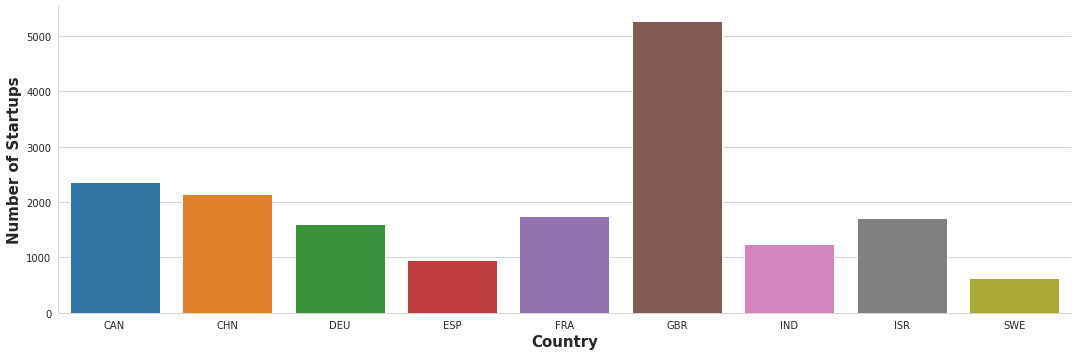

In [37]:
g = sns.catplot(data=strtup_invest_q2.query("company_country_code != 'USA'"),x='company_country_code',y='total',kind='bar'
                                            ,aspect=3,ci=False,sharey=True)
g.set_xlabels('Country',size=15,weight='bold')
g.set_ylabels('Number of Startups',size=15,weight='bold')
plt.show()

## Q4. Distribution of top-5 startup sector after year 2020 ?

In [39]:
strtup_invest_q4 = strtup_invest[['funded_year','company_market','company_permalink']].dropna(axis=0,how='any')
strtup_invest_q4['funded_year'] = strtup_invest_q4['funded_year'].astype('int')
strtup_invest_q4 = strtup_invest_q4.groupby(['funded_year','company_market'],as_index='False').count()

In [40]:
strtup_invest_q4.reset_index(inplace=True)
top_5_sectors = strtup_invest_q4.groupby('company_market').agg(total=pd.NamedAgg(column="company_permalink", aggfunc=np.sum)).sort_values('total',ascending=False)[:5].index.values
strtup_invest_q4 = strtup_invest_q4[strtup_invest_q4['company_market'].isin(top_5_sectors)]

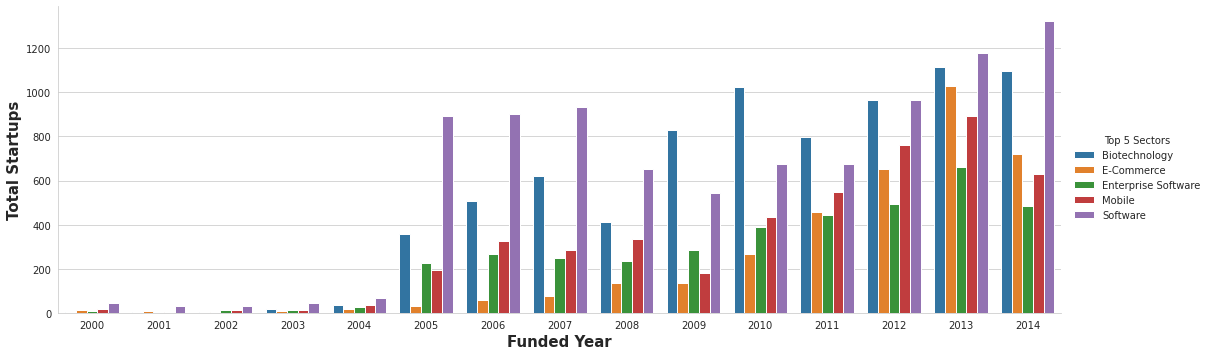

In [43]:
g= sns.catplot(data=strtup_invest_q4.query('funded_year>1999'),x='funded_year',y='company_permalink',aspect =3,
            hue='company_market',kind='bar',legend='Hello' )
g.set_xlabels('Funded Year',size=15,weight='bold')
g.set_ylabels('Total Startups',size=15,weight='bold')
g._legend.set_title(title = 'Top 5 Sectors')
plt.show()